In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import datetime
import sklearn as sk
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from plotly.offline import iplot

# Data Exploration

In [2]:
df = pd.read_csv('Data/creditcard.csv')
print(df.shape)
df

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/ df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


*Kiểm tra missing data như Null + rỗng + ký hiệu đặc biệt*

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Nhìn vào cột Time, có thể thấy bộ dữ liệu có tổng cộng 284,807 giao dịch, tổng cộng có 31 cột*


In [6]:
df.shape

(284807, 31)

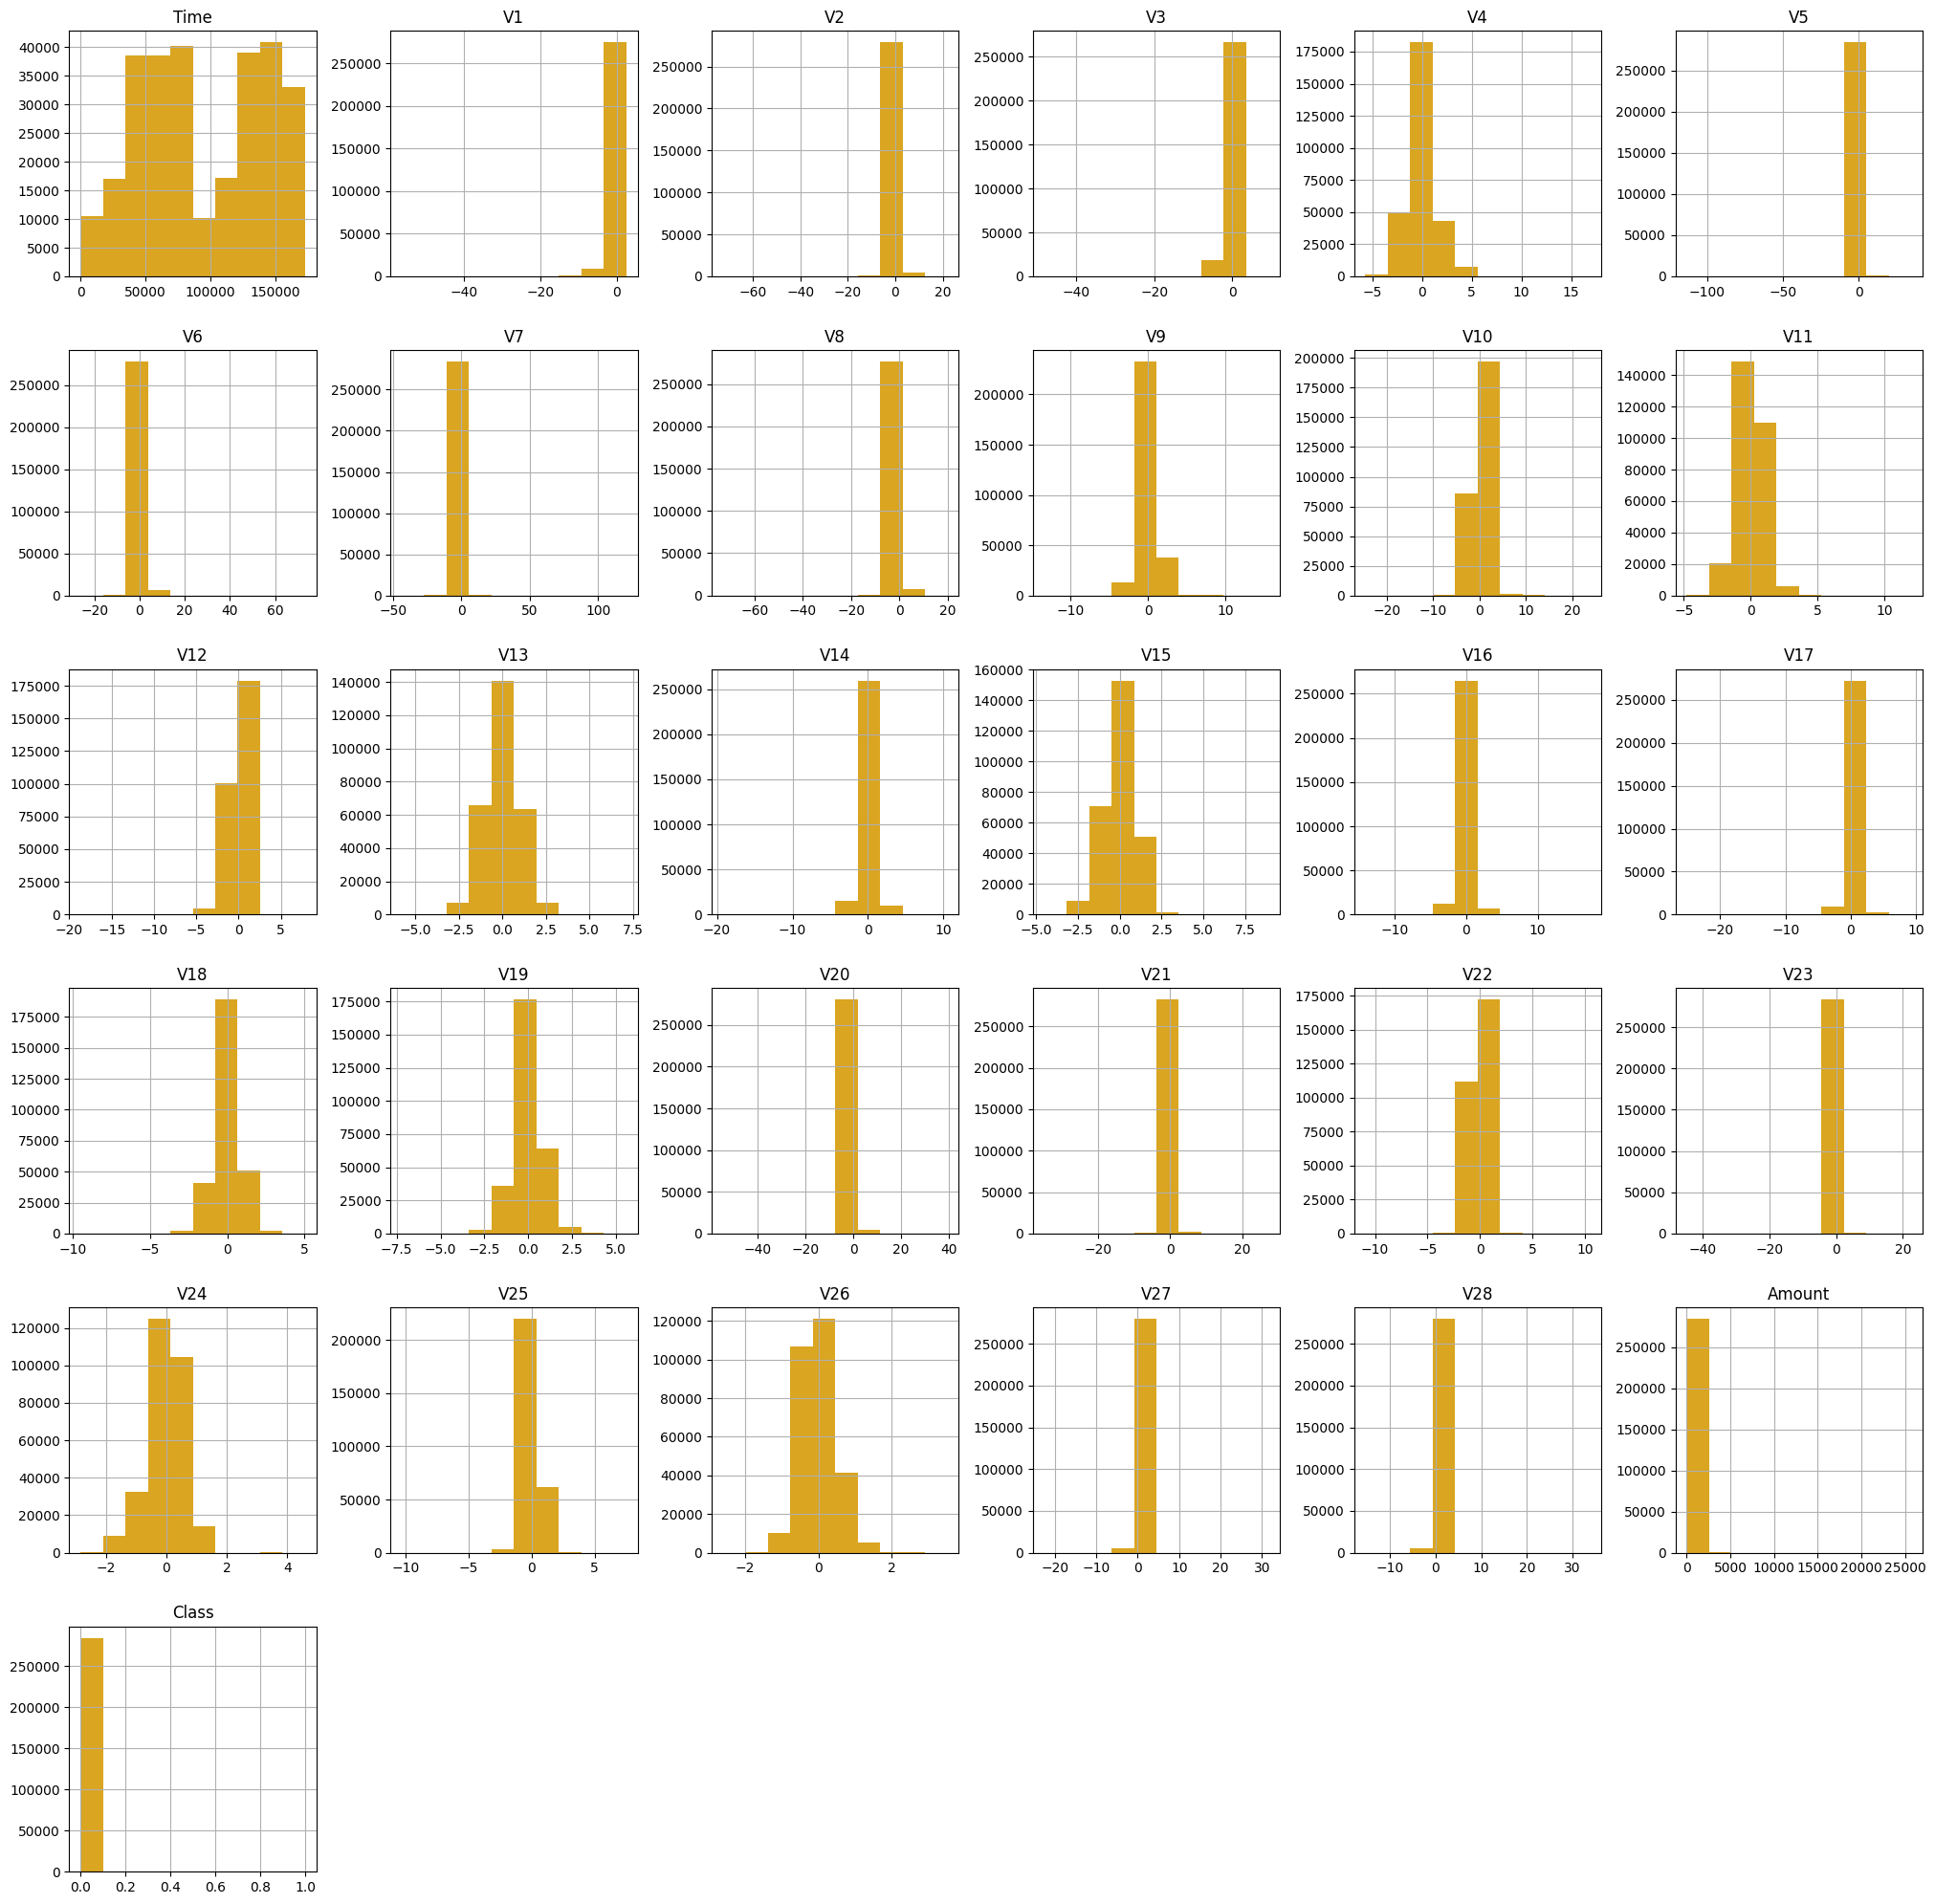

In [7]:
creditcardtransdata = pd.read_csv('Data/creditcard.csv' , low_memory=False)
creditcardtransdata.hist(figsize = (25, 25),color = "#DAA520")
plt.show()

*Biểu đồ này là biểu đồ tần suất (histogram), trục X là giá trị của biến, trục Y là tần suất xuất hiện của biến đó, thể hiện phân bố giá trị của từng đặc trưng trong dataset. Ta thấy hầu hết các biến V1–V28 có dạng gần chuẩn quanh 0 (do đã qua PCA), trong khi biến Time có hai đỉnh rõ rệt, cho thấy hai giai đoạn giao dịch khác nhau trong dữ liệu*

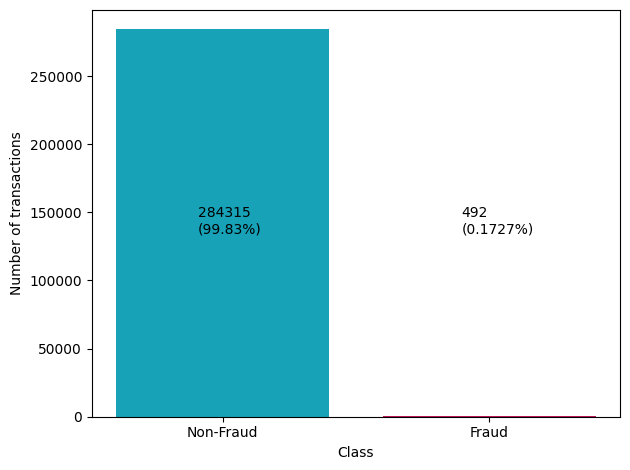

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['#17a2b8','#c2185b'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(classes[0],
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(classes[1],
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

*chỉ có 492 giao dịch là giao dịch gian lận, từ đó ta có thể thấy bộ dataset bất cân bằng, cần được xử lý khi trước khi đưa vào model*

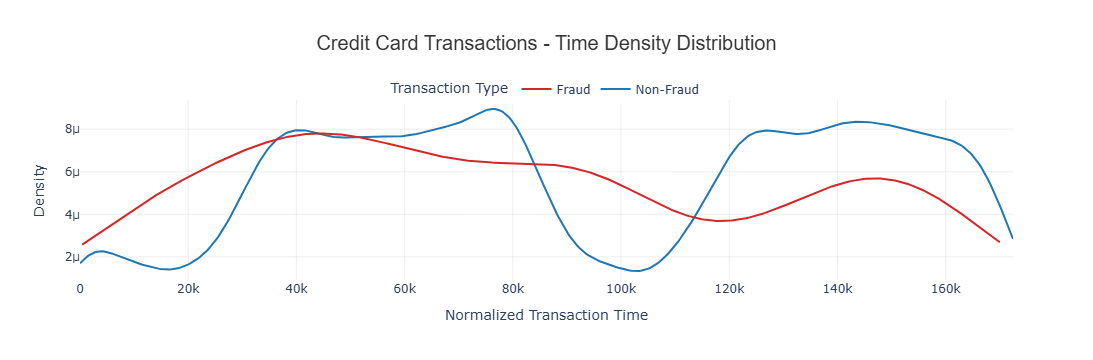

In [9]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Non-Fraud', 'Fraud']

fig = ff.create_distplot(
    hist_data,
    group_labels,
    show_hist=False,
    show_rug=False,
    colors=['#1f77b4', '#d62728']
)

fig.update_layout(
    title=dict(
        text='Credit Card Transactions - Time Density Distribution',
        x=0.5,
        font=dict(size=20, family='Arial', color='#333')
    ),
    xaxis=dict(
        title='Normalized Transaction Time',
        gridcolor='rgba(200,200,200,0.3)',
        zeroline=False
    ),
    yaxis=dict(
        title='Density',
        gridcolor='rgba(200,200,200,0.3)',
        zeroline=False
    ),
    plot_bgcolor='white',
    legend=dict(
        title='Transaction Type',
        orientation='h',
        yanchor='bottom',
        y=0.98,
        xanchor='center',
        x=0.5
    )
)
fig.show()

*Các giao dịch gian lận có sự phân bố đồng đều hơn các giao dịch hợp lệ – được phân bố đều theo thời gian, bao gồm cả những thời điểm có ít giao dịch thực tế, như vào ban đêm theo múi giờ Châu Âu.*
*Trục hoành là thời gian ( tính theo giây) được tính kể từ giao dịch đầu tiên
Trục tung là mật độ xuất hiện giao dịch*

### Phân tích mối quan hệ giữa các biến V và Class

C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\2905480352.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\2905480352.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\2905480352.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\2905480352.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




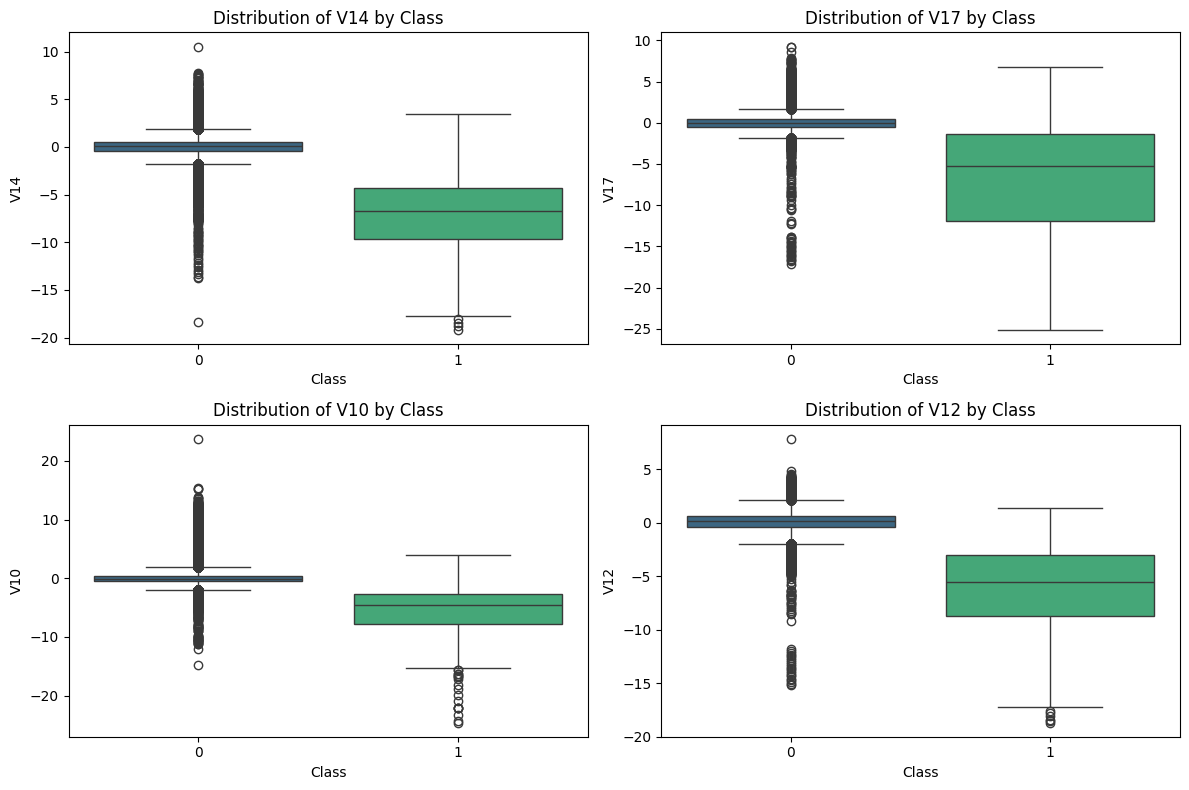

In [10]:
selected_v_cols = ['V14', 'V17', 'V10', 'V12']

# Adjusted figsize
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_v_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Class', y=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col} by Class')
plt.tight_layout()
plt.show()

*Insight từ biểu đồ:*
*   Biểu đồ trên cho thấy sự khác biệt đáng kể trong phân bố giá trị của các biến V10, V12, V14, và V17 giữa các giao dịch không gian lận (Class 0) và giao dịch gian lận (Class 1).
*   Đặc biệt, các biến V14 và V17 (là kết quả từ PCA) có vẻ là những đặc trưng rất quan trọng trong việc phân biệt hai lớp, với các giá trị trung bình và phân bố khác biệt rõ rệt cho lớp gian lận. Điều này gợi ý rằng những biến này mang thông tin mạnh mẽ liên quan đến hành vi gian lận.
*   Sự khác biệt trong phân bố này xác nhận rằng các biến V đã được biến đổi thông qua PCA vẫn giữ được khả năng phân tách giữa hai loại giao dịch, và chúng sẽ là những đặc trưng hữu ích cho mô hình phân loại.

### Mối tương quan giữa các biến V và Class

In [11]:
tar_col = "Class"
num_cols = df.select_dtypes(include=['number']).columns.tolist() #lấy tất cả các cột kiểu số trong df (numeric)
# Loại bỏ cột Class khỏi danh sách
num_cols = [col for col in num_cols if col != tar_col]
print(num_cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\2856828590.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




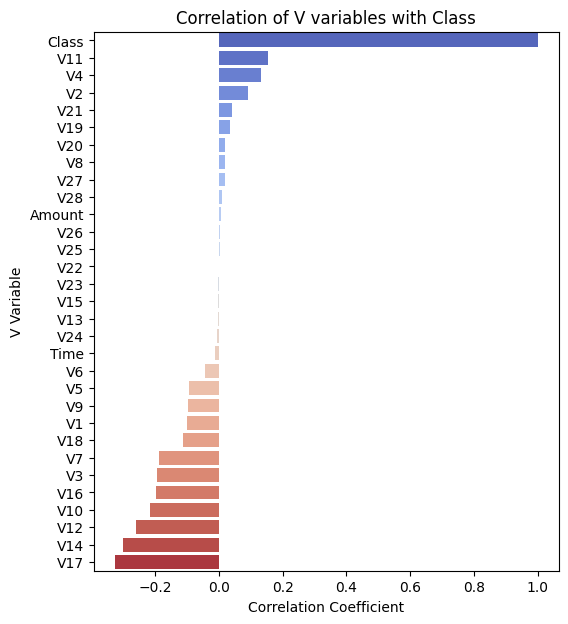

In [12]:
# Tính toán mối tương quan giữa các biến V và Class
v_class_corr = df.corr()['Class'].sort_values(ascending=False)

# Adjusted figsize
plt.figure(figsize=(6, 7))
sns.barplot(x=v_class_corr.values, y=v_class_corr.index, palette='coolwarm')
plt.title('Correlation of V variables with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('V Variable')
plt.show()

*Insight từ biểu đồ:*
*   Biểu đồ mối tương quan xác nhận rằng một số biến V (đặc biệt là V17, V14, V12, V10) có mối tương quan âm mạnh nhất với biến Class. Điều này có nghĩa là khi giá trị của các biến này giảm, khả năng giao dịch là gian lận (Class 1) tăng lên.
*   Ngược lại, các biến như V2, V4, V11 có mối tương quan dương với Class, cho thấy khi giá trị của chúng tăng, khả năng giao dịch là gian lận cũng tăng.
*   Những biến có độ tương quan cao (cả dương và âm) với Class là những đặc trưng tiềm năng quan trọng nhất để mô hình học và phân biệt giao dịch gian lận.

In [13]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1] #check duyệt qua từng cột xem có cột nào có 1 giá trị hay thôi, nunique (đếm số lượng giá trị duy nhất)
if constant_cols:
    print("Các cột hằng tìm thấy:", constant_cols)
else:
    print("Không có cột hằng nào.")

Không có cột hằng nào.


In [14]:
#2. Kiểm tra hàng trùng lặp (duplicate rows)
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"Số hàng trùng lặp: {duplicate_count}")
else:
    print("Không có hàng trùng lặp.")

Số hàng trùng lặp: 1081


In [15]:
#Xóa các hàng trùng lặp và cập nhật DataFrame
df = df.drop_duplicates()
# Kiểm tra lại số lượng hàng sau khi xóa
print("Số hàng sau khi xóa trùng lặp:", df.shape[0])

Số hàng sau khi xóa trùng lặp: 283726


In [16]:
Q1 = df[num_cols].quantile(0.25) #xem lại công thức tính giá trị ngoại lai
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Xác định outliers (giá trị nhỏ hơn Q1 - 1.5*IQR hoặc lớn hơn Q3 + 1.5*IQR)
outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) |
                (df[num_cols] > (Q3 + 1.5 * IQR)))

# Đếm số lượng outlier trên mỗi cột
outlier_counts_iqr = outliers_iqr.sum()
print("Số lượng giá trị ngoại lai (IQR) trên mỗi cột:")
print(outlier_counts_iqr[outlier_counts_iqr > 0])

Số lượng giá trị ngoại lai (IQR) trên mỗi cột:
V1         6948
V2        13390
V3         3306
V4        11094
V5        12221
V6        22886
V7         8839
V8        23904
V9         8199
V10        9345
V11         735
V12       15282
V13        3362
V14       14060
V15        2884
V16        8180
V17        7353
V18        7468
V19       10150
V20       27553
V21       14401
V22        1298
V23       18467
V24        4758
V25        5333
V26        5665
V27       38799
V28       30094
Amount    31685
dtype: int64


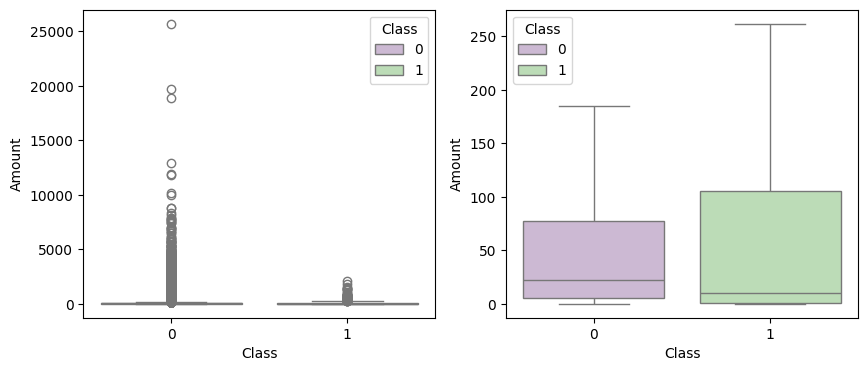

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

*Insight từ biểu đồ Boxplot (Amount vs Class):*

*   **Sự khác biệt trong phân bố Amount:** Biểu đồ cho thấy sự khác biệt rõ rệt về phân bố số tiền giao dịch giữa hai lớp. Các giao dịch không gian lận (Class 0) có phạm vi số tiền lớn hơn và nhiều outlier với giá trị rất cao. Ngược lại, các giao dịch gian lận (Class 1) tập trung ở mức số tiền nhỏ hơn nhiều, với ít outlier có giá trị cao.
*   **Tầm quan trọng của Outliers:** Biểu đồ `showfliers=True` cho thấy các outlier trong lớp không gian lận có thể có giá trị rất lớn, trong khi các outlier trong lớp gian lận có xu hướng nhỏ hơn nhiều. Điều này củng cố nhận định rằng các giao dịch gian lận thường có giá trị nhỏ hơn.
*   **Giá trị trung bình và phân vị:** Dù biểu đồ `showfliers=False` ẩn đi các outlier cực đoan, nó vẫn cho thấy hộp (box) của lớp gian lận nằm ở mức giá trị thấp hơn đáng kể so với lớp không gian lận. Điều này cho thấy phần lớn các giao dịch gian lận có số tiền nhỏ.
*   **Kết luận về tính hữu ích:** Biểu đồ này **cần thiết** vì nó trực quan hóa trực tiếp một trong những đặc trưng ban đầu (`Amount`) và mối quan hệ của nó với biến mục tiêu (`Class`). Nó xác nhận rằng `Amount` là một đặc trưng có khả năng phân biệt giữa hai lớp, dù có nhiều outlier trong lớp không gian lận. Việc hiểu phân bố này giúp chúng ta quyết định các bước tiền xử lý phù hợp cho biến `Amount` (như chuẩn hóa) và giải thích tại sao các mô hình có thể gặp khó khăn trong việc phân loại các giao dịch gian lận có số tiền lớn (nếu có).

In [18]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1)

why do i need to do this

In [19]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col != tar_col]
num_cols = np.array(num_cols)

also why

In [20]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350252,1.642235
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254325,1.642257
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.082239,1.642278
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313391,1.642278


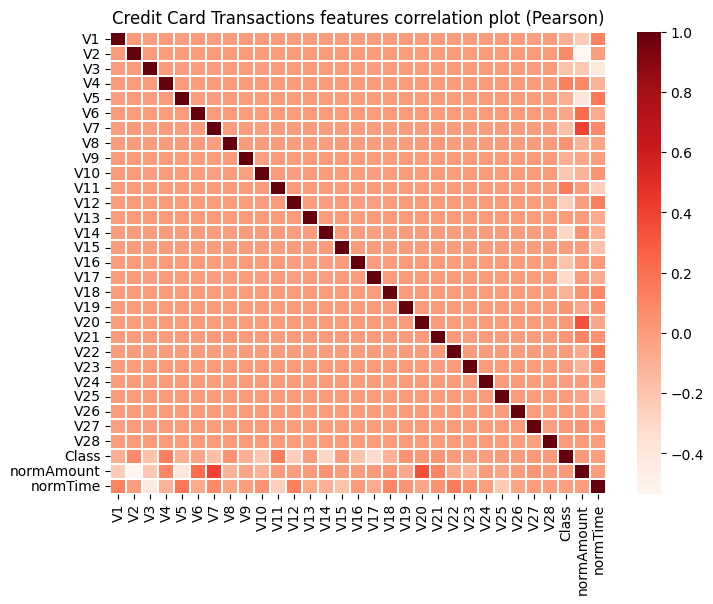

In [21]:
plt.figure(figsize = (8, 6))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [22]:
# 1) Tách feature và target
X = df.drop(tar_col, axis=1)
y = df[tar_col]

# 2) Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% dùng để test
    stratify=y,           # giữ nguyên tỷ lệ lớp (rất quan trọng khi imbalanced)
    random_state=42       # để kết quả có thể tái lập
)

# 3) Kiểm tra kích thước và phân bố
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:",  X_test.shape,  y_test.shape)
print("Train class ratio:\n", y_train.value_counts(normalize=True))
print("Test  class ratio:\n", y_test.value_counts(normalize=True))

Train shape: (226980, 30) (226980,)
Test shape: (56746, 30) (56746,)
Train class ratio:
 Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Test  class ratio:
 Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [23]:
from imblearn.pipeline import Pipeline  #SMOTE nhẹ hơn
pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),               # scale dữ liệu trước
    ('smote', SMOTE(random_state=42 ,sampling_strategy = 0.3)),        # oversample chỉ trên train, chỉ SMOTE 30% thôi
    ('model', LogisticRegression(max_iter=1000, class_weight=None))
])

In [24]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,sampling_strategy,0.3
,random_state,42


In [25]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

In [26]:
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.17      0.85      0.28        95

    accuracy                           0.99     56746
   macro avg       0.58      0.92      0.64     56746
weighted avg       1.00      0.99      1.00     56746

AUC-ROC: 0.963694234969606


### Confusion Matrix for Logistic Regression

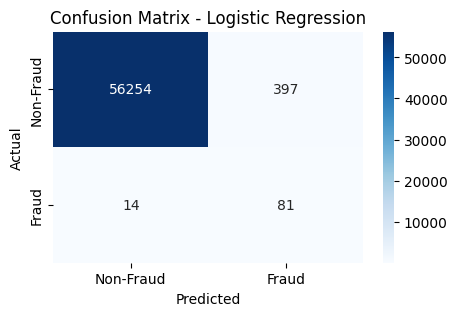

In [27]:
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Model dự đoán 56254 giao dịch là bình thường (và thật sự bình thường)
Có 397 giao dịch hợp lệ nhưng bị model nhầm là gian lận
Có 14 giao dịch gian lận nhưng model lại tưởng là bình thường Có 81 giao dịch gian lận được model phát hiện đúng”

C:\Users\DLCH\AppData\Local\Temp\ipykernel_9844\3376418202.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



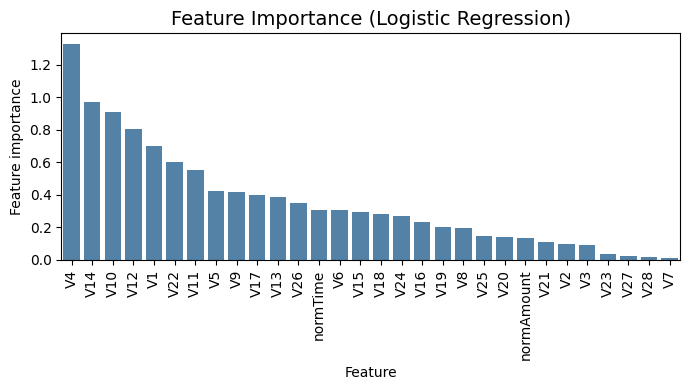

In [28]:
model_lr = pipeline.named_steps['model']
coef = model_lr.coef_[0]

tmp = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': np.abs(coef)
}).sort_values(by='Feature importance', ascending=False)

# Vẽ biểu đồ giống RF
plt.figure(figsize=(7, 4))
plt.title('Feature Importance (Logistic Regression)', fontsize=14)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp, color='steelblue')
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [29]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek # Loại bỏ các điểm gây nhiễu (noise) và làm rõ ranh giới giữa hai lớp.
pipe_rf = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('resample', SMOTETomek(
        sampling_strategy=0.3,
        random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

In [30]:
pipe_rf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('resample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,sampling_strategy,0.3
,random_state,42


In [31]:
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]

In [32]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Báo cáo phân loại Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9986606985514398
Random Forest ROC AUC: 0.9746344422776947
Báo cáo phân loại Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.57      0.81      0.67        95

    accuracy                           1.00     56746
   macro avg       0.79      0.90      0.83     56746
weighted avg       1.00      1.00      1.00     56746



### Confusion Matrix for Random Forest

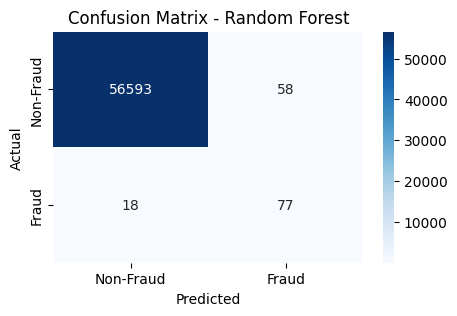

In [33]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3)) # Adjusted figsize
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

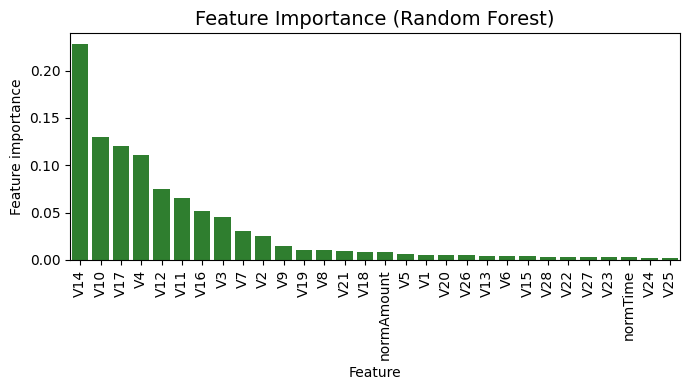

In [34]:
model_rf = pipe_rf.named_steps['model']
tmp_rf = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': model_rf.feature_importances_
}).sort_values(by='Feature importance', ascending=False)

plt.figure(figsize=(7, 4))
plt.title('Feature Importance (Random Forest)', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', data=tmp_rf, color='forestgreen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [44]:
pipe_xgb = Pipeline(steps=[
    ('scaler', RobustScaler()),             # scale dữ liệu
    ('smote', SMOTE(random_state=42)),      # xử lý imbalance
    ('model', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
    ))
])


In [45]:
pipe_xgb.fit(X_train, y_train)

D:\creditcard-fraud\venv\lib\site-packages\xgboost\training.py:183: UserWarning:

[01:23:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,steps,"[('scaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,sampling_strategy,'auto'
,random_state,42


In [46]:
y_pred_xgb = pipe_xgb.predict(X_test)
y_proba_xgb = pipe_xgb.predict_proba(X_test)[:, 1]

In [47]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9992598597257957
XGBoost ROC AUC: 0.9698038497950052
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.76      0.81      0.79        95

    accuracy                           1.00     56746
   macro avg       0.88      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746



# Trade off giữa việc SMOTE và không SMOTE ở mô hình này là
XGBoost Accuracy: 0.9993303492757198
XGBoost ROC AUC: 0.9220077872922762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.71      0.78        95

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746

Kết quả thực nghiệm cho thấy việc áp dụng SMOTE mang lại sự trade-off rõ ràng giữa độ chính xác tổng thể và khả năng phát hiện giao dịch gian lận. Cụ thể, khi sử dụng SMOTE, mô hình XGBoost đạt recall và AUC cao hơn, thể hiện khả năng nhận diện tốt hơn lớp thiểu số, dù accuracy giảm nhẹ do mô hình hy sinh một phần độ chính xác ở lớp đa số. Điều này cho thấy SMOTE giúp mô hình bớt thiên lệch về lớp đa số và tăng tính công bằng trong phân loại, đặc biệt phù hợp cho các bài toán nhạy cảm như phát hiện gian lận thẻ tín dụng.

### Confusion Matrix for XGBoost

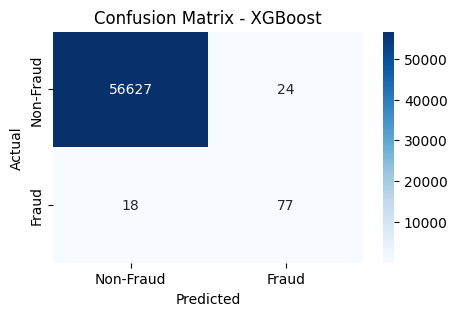

In [40]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 3)) # Adjusted figsize
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

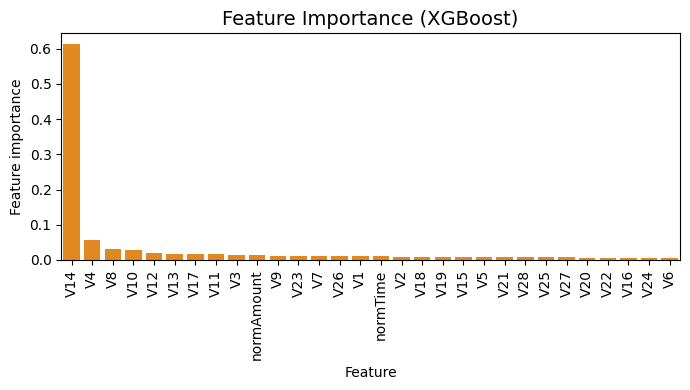

In [41]:
model_xgb = pipe_xgb.named_steps['model']
tmp_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': model_xgb.feature_importances_
}).sort_values(by='Feature importance', ascending=False)

plt.figure(figsize=(7, 4))
plt.title('Feature Importance (XGBoost)', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', data=tmp_xgb, color='darkorange')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Model Evaluation

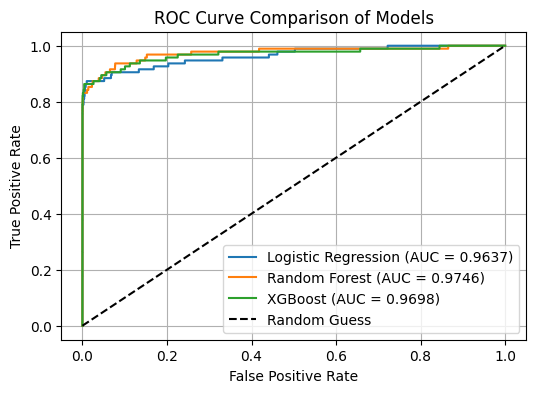

In [42]:
# Get ROC curve data for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba)

# Get ROC curve data for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# Get ROC curve data for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(6, 4)) # Adjusted figsize

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.4f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend()
plt.grid(True)
plt.show()

Insight

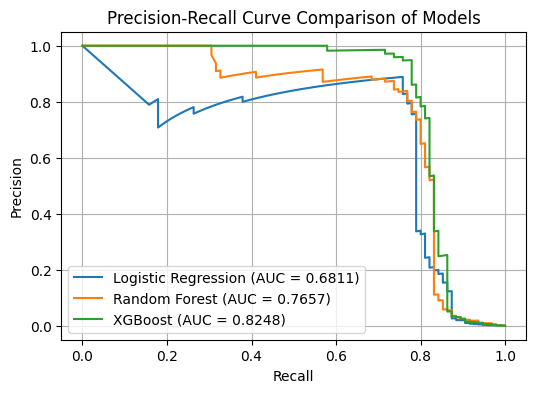

In [43]:
from sklearn.metrics import precision_recall_curve, auc

# Get Precision-Recall curve data for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba)
auc_lr_pr = auc(recall_lr, precision_lr)

# Get Precision-Recall curve data for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
auc_rf_pr = auc(recall_rf, precision_rf)

# Get Precision-Recall curve data for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
auc_xgb_pr = auc(recall_xgb, precision_xgb)

plt.figure(figsize=(6, 4)) # Adjusted figsize

plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr_pr:.4f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_rf_pr:.4f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUC = {auc_xgb_pr:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison of Models')
plt.legend()
plt.grid(True)
plt.show()

Insight